In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
warnings.filterwarnings('ignore')
%matplotlib inline


In [93]:
df=pd.read_csv('/content/Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [95]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [96]:
df.shape

(1048575, 21)

In [97]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [98]:
df['TOBACCO'].value_counts()

,count
TOBACCO,
2,960979
1,84376
98,3220


In [99]:
df['INTUBED'].value_counts()


,count
INTUBED,
97,848544
2,159050
1,33656
99,7325


In [100]:
df['PREGNANT'].value_counts()


,count
PREGNANT,
97,523511
2,513179
1,8131
98,3754


**1 means yes and 0 means no and values as 97 and 99 are missing data**

In [101]:
df['CLASIFFICATION_FINAL'].value_counts()


,count
CLASIFFICATION_FINAL,
7,499250
3,381527
6,128133
5,26091
1,8601
4,3122
2,1851


In [102]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [103]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION',
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    df = df[(df[col] == 1)|(df[col] == 2)]

In [104]:
df.head(10)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
5,2,1,1,2,9999-99-99,2,1,40,2,2,...,2,2,2,2,2,2,2,2,3,2
6,2,1,1,1,9999-99-99,97,2,64,2,2,...,2,2,2,2,2,2,2,2,3,97
7,2,1,1,1,9999-99-99,97,1,64,2,1,...,2,1,1,2,2,2,1,2,3,97
8,2,1,1,2,9999-99-99,2,2,37,2,1,...,2,2,1,2,2,1,2,2,3,2
9,2,1,1,2,9999-99-99,2,2,25,2,2,...,2,2,2,2,2,2,2,2,3,2


In [105]:
df['DATE_DIED'] = [2 if row =='9999-99-99' else 1 for row in df['DATE_DIED']]

In [106]:
df['DATE_DIED'].value_counts()

,count
DATE_DIED,
2,950438
1,74714


In [107]:
df.drop(columns=['INTUBED','ICU'],inplace=True)


In [108]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL'],
      dtype='object')

In [109]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7


In [110]:
print('MALE',df.query('SEX==2')['PREGNANT'].value_counts(), sep='\n')

MALE
PREGNANT
97    511936
Name: count, dtype: int64


In [111]:
print('FEMALE',df.query('SEX==1')['PREGNANT'].value_counts(), sep='\n')

FEMALE
PREGNANT
2     502200
1       7841
98      3175
Name: count, dtype: int64


In [112]:
df['PREGNANT'] = df['PREGNANT'].replace(97,2)
df['PREGNANT'] = df['PREGNANT'].replace(98,2)

In [113]:
df['PREGNANT'].value_counts()

,count
PREGNANT,
2,1017311
1,7841


In [114]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7


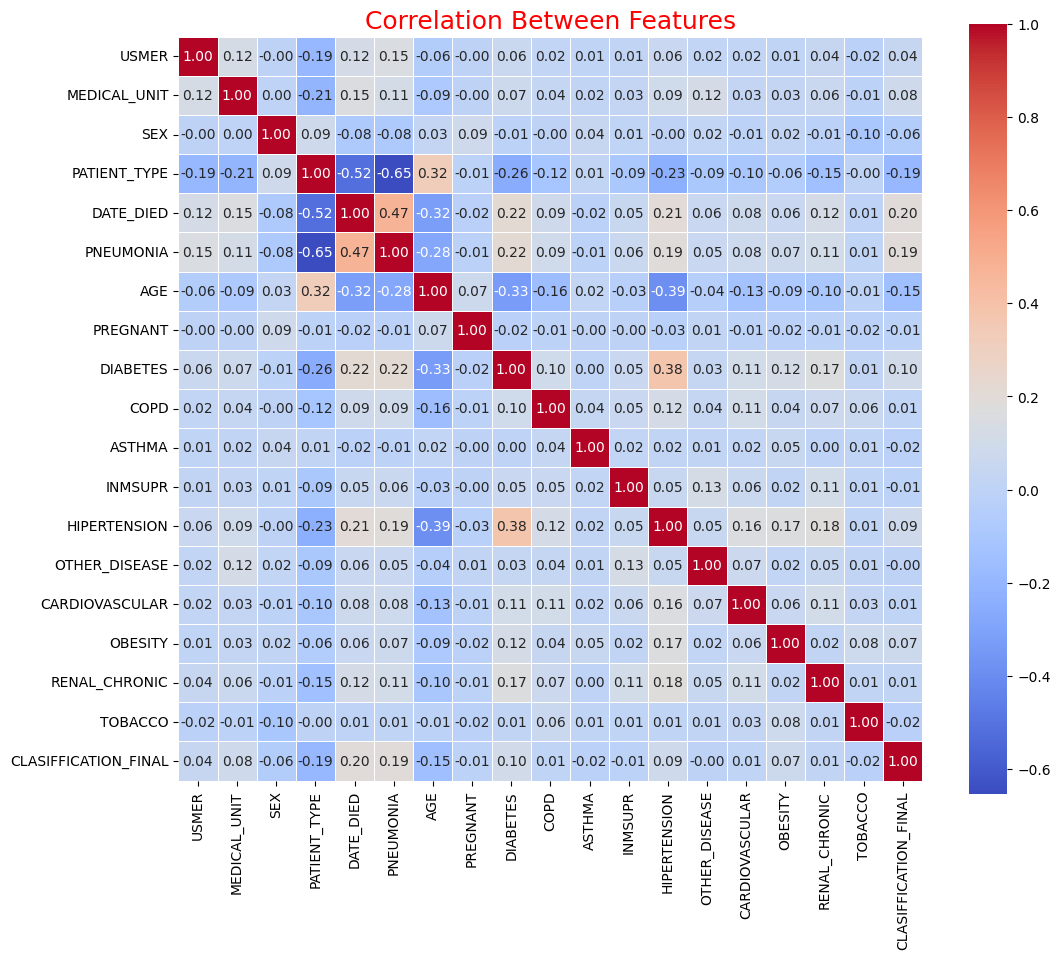

In [115]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Between Features', fontsize=18, color='red')
plt.show()


<Axes: title={'center': 'Age Distribution'}, xlabel='AGE', ylabel='Count'>

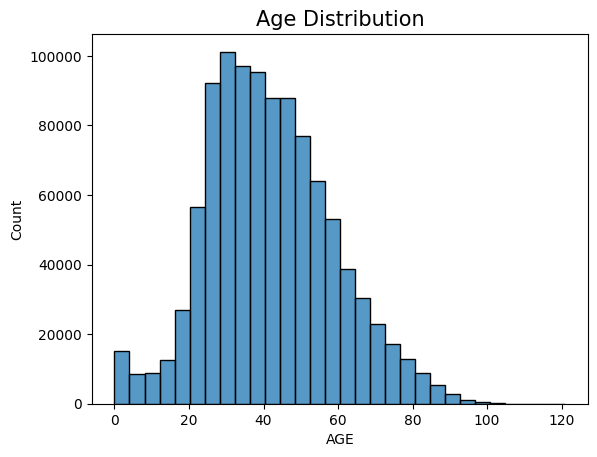

In [116]:
plt.title('Age Distribution', fontsize=15)
sns.histplot(data=df, x=df['AGE'],bins=30)

<Axes: xlabel='DATE_DIED', ylabel='AGE'>

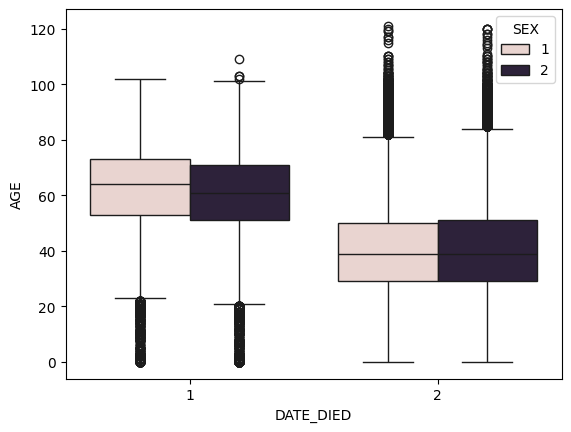

In [117]:
sns.boxplot(x="DATE_DIED", y="AGE",hue="SEX",data=df)

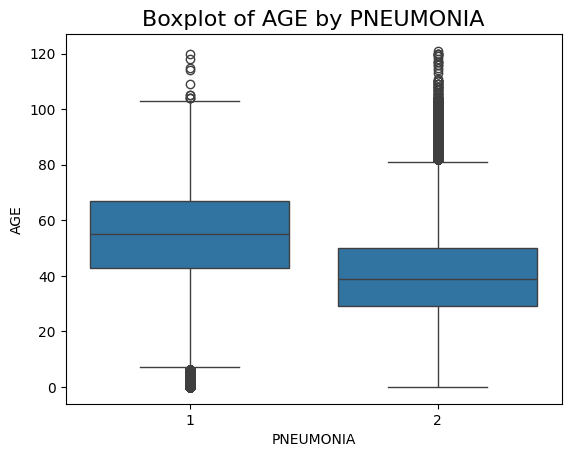

In [118]:
sns.boxplot(x='PNEUMONIA', y='AGE', data=df)
plt.title('Boxplot of AGE by PNEUMONIA', fontsize=16)
plt.show()

In [119]:
grouped_data = df.groupby(['DIABETES', 'HIPERTENSION'])['AGE'].mean()
print(grouped_data)

DIABETES  HIPERTENSION
1         1               60.410144
          2               53.035055
2         1               54.898110
          2               38.078753
Name: AGE, dtype: float64


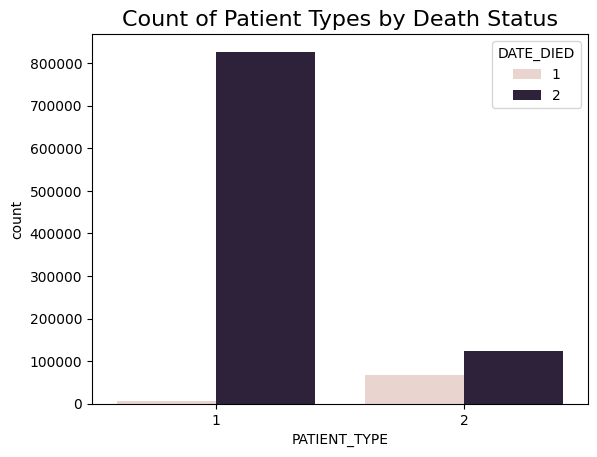

In [120]:
sns.countplot(data=df, x='PATIENT_TYPE', hue='DATE_DIED')
plt.title('Count of Patient Types by Death Status', fontsize=16)
plt.show()

In [121]:
correlation_with_death = df.corr()['DATE_DIED'].sort_values(ascending=False)
print(correlation_with_death)

DATE_DIED               1.000000
PNEUMONIA               0.470800
DIABETES                0.217115
HIPERTENSION            0.205158
CLASIFFICATION_FINAL    0.197313
MEDICAL_UNIT            0.154588
RENAL_CHRONIC           0.119396
USMER                   0.118973
COPD                    0.089846
CARDIOVASCULAR          0.076582
OTHER_DISEASE           0.057247
OBESITY                 0.056427
INMSUPR                 0.049308
TOBACCO                 0.005245
ASTHMA                 -0.017221
PREGNANT               -0.020997
SEX                    -0.080882
AGE                    -0.322412
PATIENT_TYPE           -0.520023
Name: DATE_DIED, dtype: float64


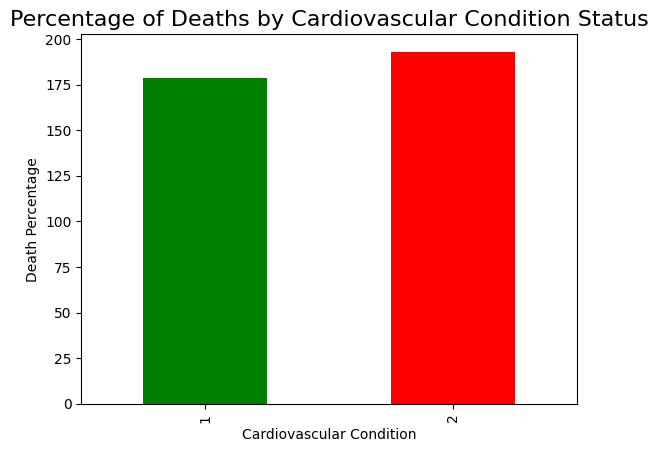

In [122]:
cardio_death = df.groupby('CARDIOVASCULAR')['DATE_DIED'].mean() * 100
cardio_death.plot(kind='bar', color=['green', 'red'])
plt.title('Percentage of Deaths by Cardiovascular Condition Status', fontsize=16)
plt.xlabel('Cardiovascular Condition')
plt.ylabel('Death Percentage')
plt.show()


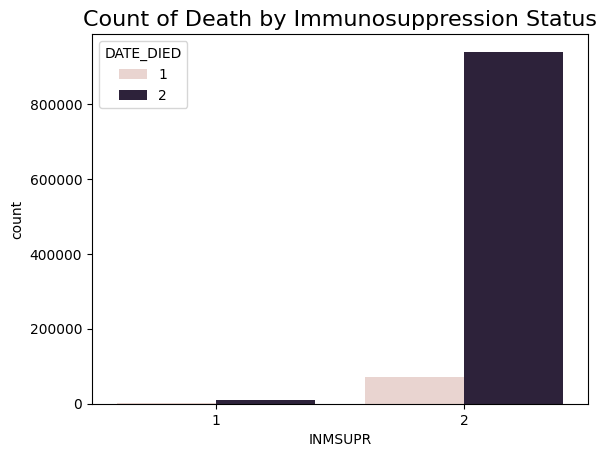

In [123]:
sns.countplot(data=df, x='INMSUPR', hue='DATE_DIED')
plt.title('Count of Death by Immunosuppression Status', fontsize=16)
plt.show()


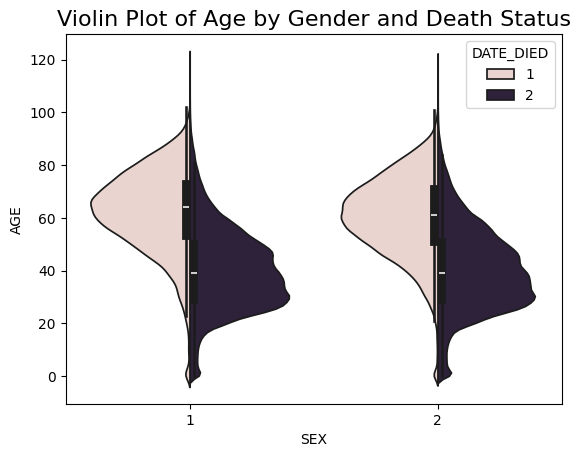

In [124]:
sns.violinplot(x='SEX', y='AGE', hue='DATE_DIED', data=df, split=True)
plt.title('Violin Plot of Age by Gender and Death Status', fontsize=16)
plt.show()


In [125]:
standard_scaler = StandardScaler()
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])

In [126]:
y = df['DATE_DIED']
x = df.drop('DATE_DIED', axis=1)

In [127]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

print('Train_X', train_x.shape)
print('Test_X', test_x.shape)
print('Train_Y', train_y.shape)
print('Test_Y', test_y.shape)

Train_X (820121, 18)
Test_X (205031, 18)
Train_Y (820121,)
Test_Y (205031,)


In [128]:
log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print("Accuracy", log_reg.score(test_x, test_y))

Accuracy 0.938409313713536


In [129]:
print("F1 Score", f1_score(test_y, log_reg.predict(test_x),average=None))

F1 Score [0.50617863 0.96715649]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

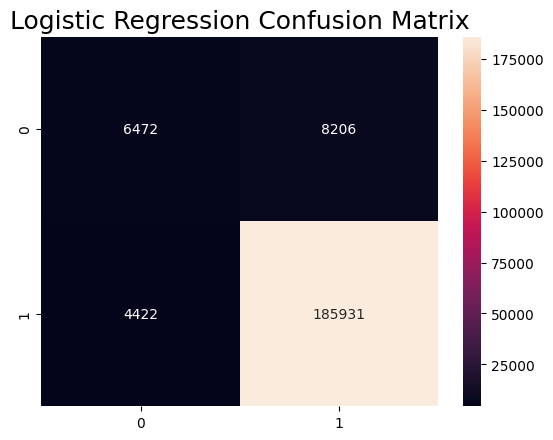

In [130]:
sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

Text(0.5, 1.0, 'Death Distribution')

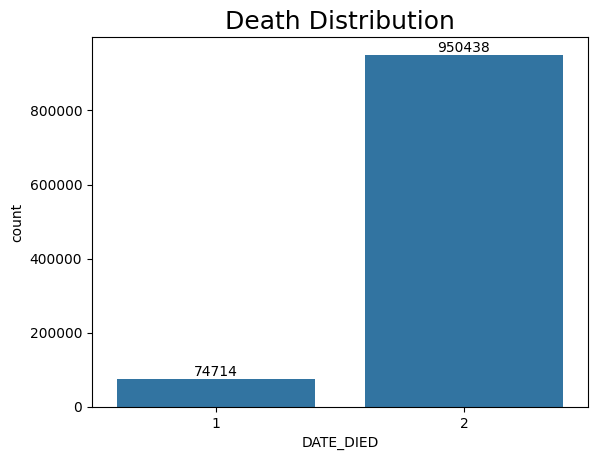

In [131]:
ax = sns.countplot(x=df['DATE_DIED'])
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)

In [132]:
rand_under = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

Text(0.5, 1.0, 'Death Distribution After Resampling')

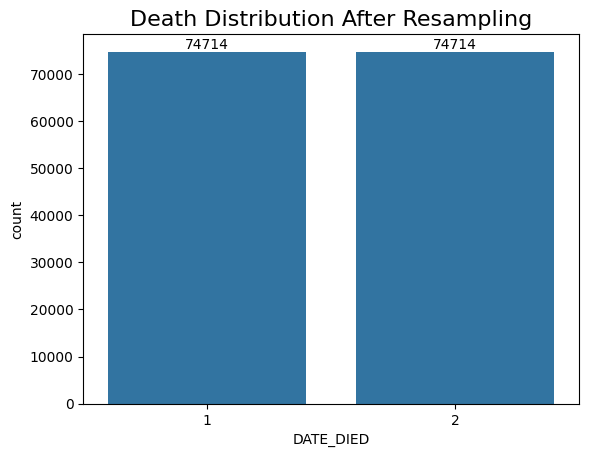

In [133]:
ax = sns.countplot(x=y_resampled)
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=16)

In [134]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print('Train_X', train_x.shape)
print('Test_X', test_x.shape)
print('Train_Y', train_y.shape)
print('Test_Y', test_y.shape)

Train_X (119542, 18)
Test_X (29886, 18)
Train_Y (119542,)
Test_Y (29886,)


**Logestic Regression**

In [135]:
log_reg.fit(train_x, train_y)
print("Accuracy", log_reg.score(test_x, test_y))

Accuracy 0.9108278123536104


In [136]:
print("F1 Score", f1_score(test_y, log_reg.predict(test_x),average=None))

F1 Score [0.91210712 0.90951071]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

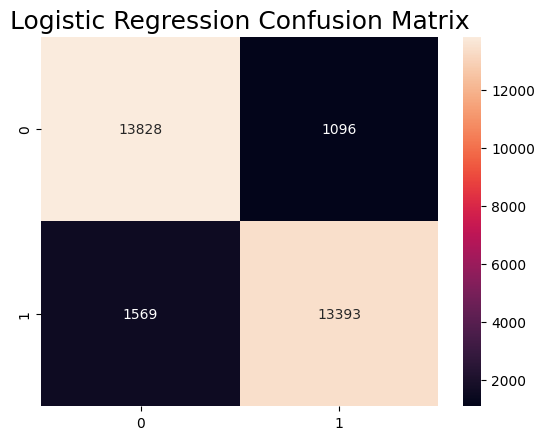

In [137]:
sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

**Decision Tree**

In [138]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
predictions = decision_tree.predict(test_x)


In [139]:
accuracy = accuracy_score(test_y, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [140]:
scores = cross_val_score(decision_tree, train_x, train_y, cv=5)
print(f'Mean CV Score: {scores.mean():.2f}')

Mean CV Score: 0.88


**SVM**

In [141]:
svm_model = SVC(kernel='rbf')
svm_model.fit(train_x, train_y)

SVC()

In [142]:
test_predictions = svm_model.predict(test_x)
accuracy = accuracy_score(test_y, test_predictions)
f1 = f1_score(test_y, test_predictions, average='weighted')
conf_matrix = confusion_matrix(test_y, test_predictions)

In [143]:
print(f'Test Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9117
F1 Score: 0.9116


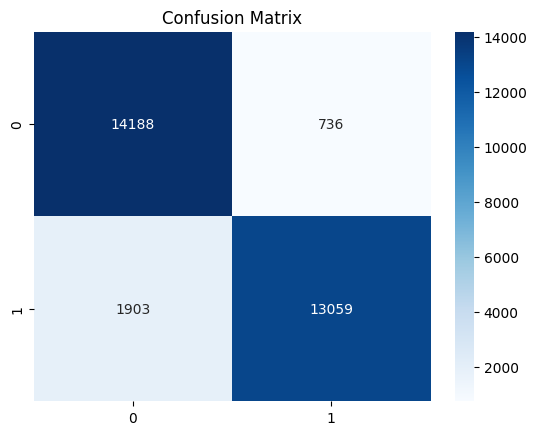

In [144]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [145]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [146]:
test_predictions = rf_model.predict(test_x)
accuracy = accuracy_score(test_y, test_predictions)
print(f'Test Accuracy: {accuracy:.4f}')

f1 = f1_score(test_y, test_predictions, average='weighted')
print(f'F1 Score: {f1:.4f}')

Test Accuracy: 0.9049
F1 Score: 0.9049


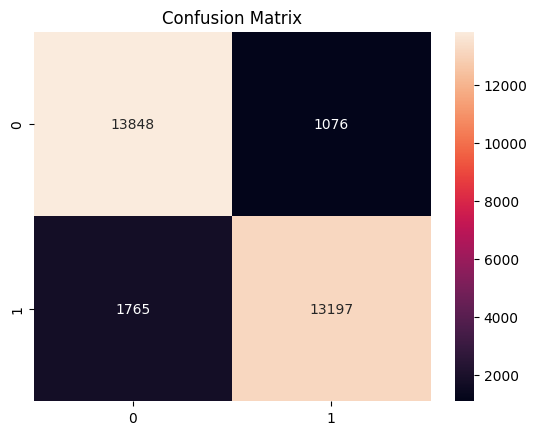

In [147]:
conf_matrix = confusion_matrix(test_y, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

**DeepLearning Model**

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score


In [149]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(train_x.shape[1],)))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

num_classes = 3
model.add(Dense(units=num_classes, activation='softmax'))


In [150]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [151]:
history = model.fit(train_x, train_y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8698 - loss: 0.3183 - val_accuracy: 0.9084 - val_loss: 0.2522
Epoch 2/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9089 - loss: 0.2481 - val_accuracy: 0.9102 - val_loss: 0.2493
Epoch 3/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9116 - loss: 0.2463 - val_accuracy: 0.9096 - val_loss: 0.2493
Epoch 4/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9111 - loss: 0.2460 - val_accuracy: 0.9087 - val_loss: 0.2506
Epoch 5/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9122 - loss: 0.2441 - val_accuracy: 0.9084 - val_loss: 0.2552
Epoch 6/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9108 - loss: 0.2428 - val_accuracy: 0.9091 - val_loss: 0.2486
Epoch 7/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9133 - loss: 0.2415 - val_accuracy: 0.9104 - val_loss: 0.2469
Epoch 8/50
2989/2989 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9130 - loss: 0.239

In [152]:
predictions = model.predict(test_x)
predictions = predictions.argmax(axis=-1)
accuracy = accuracy_score(test_y, predictions)
print(f'Test Accuracy: {accuracy:.4f}')

934/934 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Test Accuracy: 0.9168


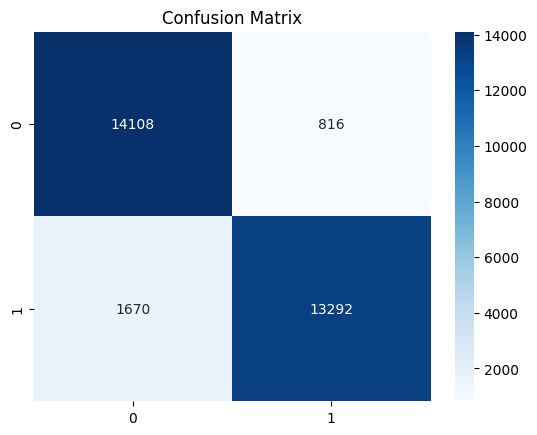

In [153]:
conf_matrix = confusion_matrix(test_y, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [154]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,627 (45.42 KB)

 Trainable params: 3,875 (15.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,752 (30.29 KB)

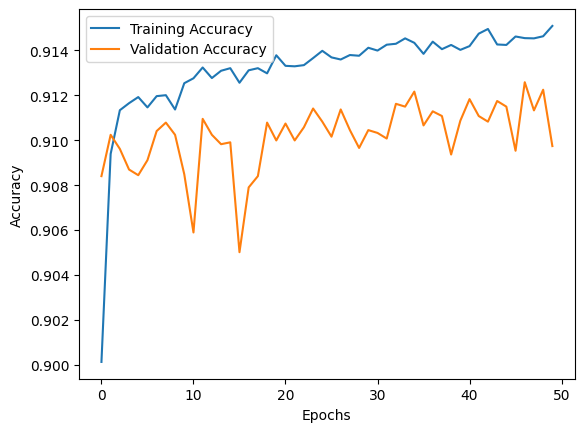

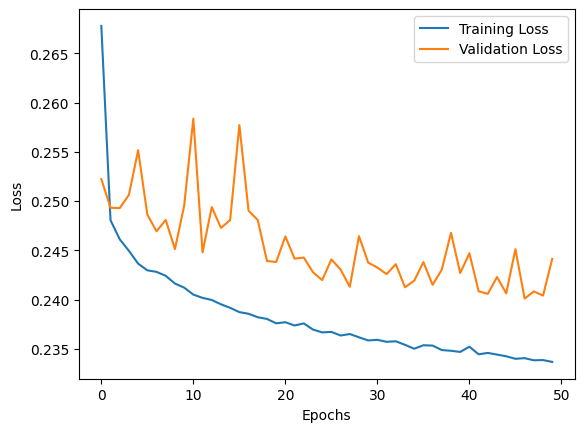

In [155]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()